## 1. Understand problem statement

First, We should understand problem or question that what do they want from us?

## 2. Import necessary libraries and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing

Load the data using pandas library function read_csv

In [2]:
car = pd.read_csv('CarPrice.csv')
car.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## 3. Check the Data

In [3]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
car.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
car.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

From this above output we can show that there is no any null values available in data

In [6]:
car.duplicated().sum()

0

In [7]:
car.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

Length of Unique Value

In [8]:
print('car_ID:', len(car['car_ID'].unique()))
print('symboling:', len(car['symboling'].unique()))
print('fueltype:', len(car['fueltype'].unique()))
print('aspiration:', len(car['aspiration'].unique()))
print('doornumber:', len(car['doornumber'].unique()))
print('carbody:', len(car['carbody'].unique()))
print('drivewheel:', len(car['drivewheel'].unique()))
print('enginelocation:', len(car['enginelocation'].unique()))
print('wheelbase:', len(car['wheelbase'].unique()))
print('carlength:', len(car['carlength'].unique()))
print('carwidth:', len(car['carwidth'].unique()))
print('carheight:', len(car['carheight'].unique()))
print('curbweight:', len(car['curbweight'].unique()))
print('enginetype:', len(car['enginetype'].unique()))
print('cylindernumber:', len(car['cylindernumber'].unique()))
print('enginesize:', len(car['enginesize'].unique()))
print('fuelsystem:', len(car['fuelsystem'].unique()))
print('stroke:', len(car['stroke'].unique()))
print('compressionratio:', len(car['compressionratio'].unique()))
print('horsepower:', len(car['horsepower'].unique()))
print('peakrpm:', len(car['peakrpm'].unique()))
print('citympg:', len(car['citympg'].unique()))
print('highwaympg:', len(car['highwaympg'].unique()))
print('price:', len(car['price'].unique()))


car_ID: 205
symboling: 6
fueltype: 2
aspiration: 2
doornumber: 2
carbody: 5
drivewheel: 3
enginelocation: 2
wheelbase: 53
carlength: 75
carwidth: 44
carheight: 49
curbweight: 171
enginetype: 7
cylindernumber: 7
enginesize: 44
fuelsystem: 8
stroke: 37
compressionratio: 32
horsepower: 59
peakrpm: 23
citympg: 29
highwaympg: 30
price: 189


## 4. Data Preprocessing

In [9]:
len(car['car_ID'])

205

Drop car_ID column

In [10]:
car.drop(['car_ID'], axis=1, inplace=True)

Let's check unique value

In [11]:
car['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2], dtype=int64)

In [12]:
print(len(car['CarName'].unique()))
car['CarName'].unique()

147


array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

Here, we make a saperate columns for car company

In [13]:
car['Company']= car.CarName.str.split(expand=True)[0]

In [14]:
del car['CarName']

In [15]:
# company
car['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
car.replace(['maxda','nissan','porcshce','toyouta','vokswagen','vw'],['mazda','Nissan','porsche','toyota','volkswagen','volkswagen'], inplace=True)
car['Company'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
 # label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
car['symboling']= label_encoder.fit_transform(car['symboling'])
car['fueltype']= label_encoder.fit_transform(car['fueltype'])
car['aspiration']= label_encoder.fit_transform(car['aspiration'])
car['doornumber']= label_encoder.fit_transform(car['doornumber'])
car['carbody']= label_encoder.fit_transform(car['carbody'])
car['drivewheel']= label_encoder.fit_transform(car['drivewheel'])
car['enginelocation']= label_encoder.fit_transform(car['enginelocation'])
car['Company']= label_encoder.fit_transform(car['Company'])

In [18]:
print(len(car.columns))
car.columns

25


Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber', 'enginesize',
       'fuelsystem', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price', 'Company'],
      dtype='object')

## 5. Feature selection (correlation)

When creating a predictive model, feature selection is the method of reducing the number of input variables.

In some cases, reducing the number of input variables might improve the accuracy of the model while also lowering the computing cost of modelling.

There are method are listed over here for feature selection

##### A.  Filter methods
This technique filters features based on the dataset's general properties (some measure like correlation), such as correlation with the dependent variable. There is no predictive model used while using the filter approach. When there are a lot of characteristics, this strategy is usually quicker and more effective. prevents overfitting, but occasionally may not choose the optimal features.

##### B. Wrapper methods
The feature selection algorithm in the wrapper method exits as a wrapper around the predictive model algorithm and chooses the best features using the same model (more on this from this excellent research paper). Better performance, although being computationally expensive and vulnerable to overfitting.

##### C. Embedded method
The feature selection process is included into the learning or model-building phases in an embedded technique. It is less prone to overfitting and less computationally demanding than the wrapper method.

### A. Filter methods
##### 1. Information Gain

The entropy decrease caused by a dataset modification is calculated using information gain. By assessing each variable's information gain in relation to the target variable, it can be used for feature selection.

https://www.analyticsvidhya.com/blog/2020/10/feature-selection-techniques-in-machine-learning/#:~:text=Fisher%20score%20is%20one%20of,fisher's%20score%20in%20descending%20order.

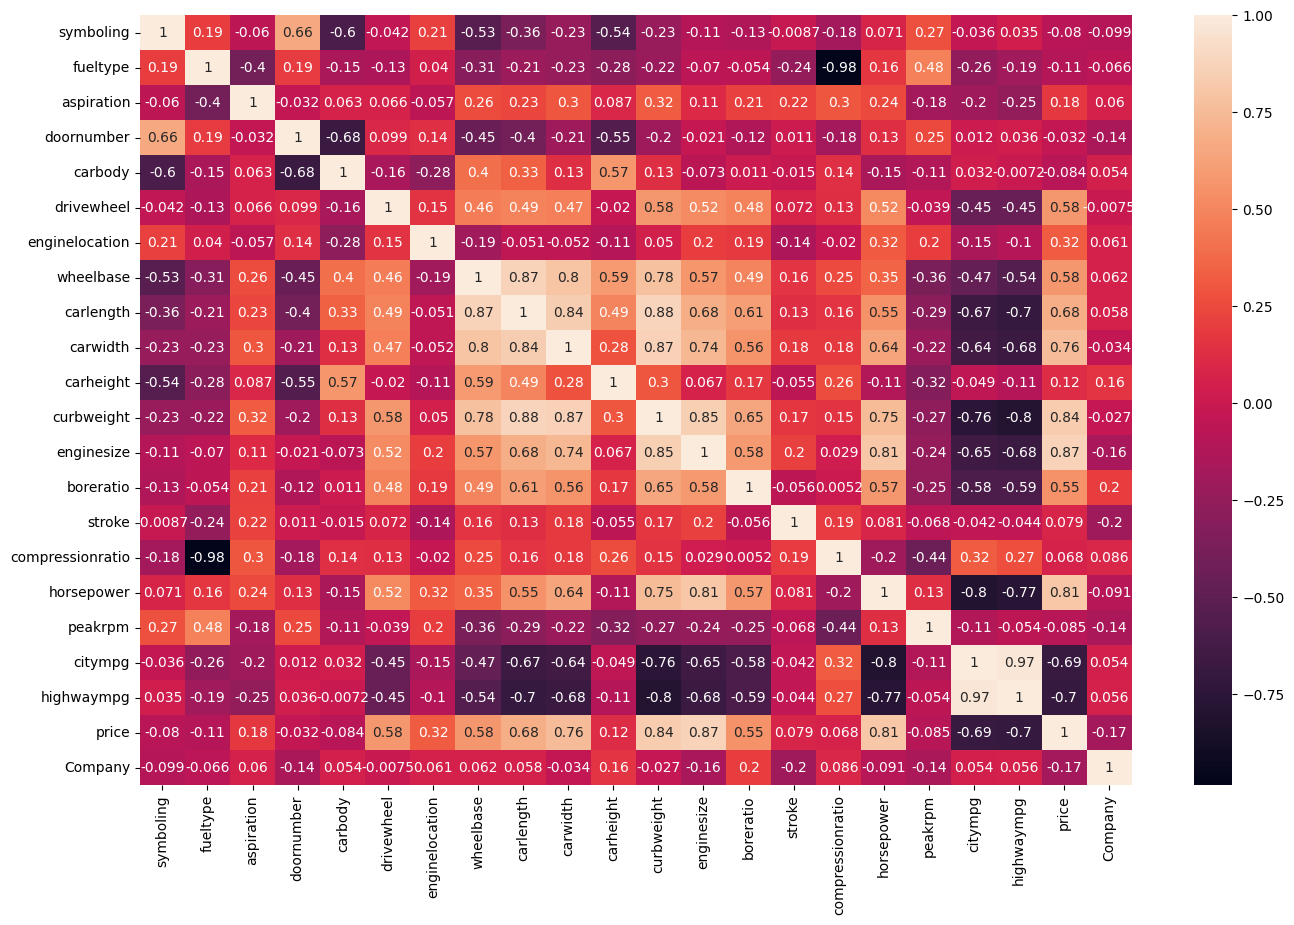

In [19]:
# plot the data

plt.figure(figsize=(16,10))
ax = sns.heatmap(car.corr(), annot=True)
plt.show()

##### Here, we apply feature selection (correlation) and select feature which are more correlate with target value

In [20]:
X = car[['symboling','fueltype','doornumber','carbody', 'carheight', 'stroke', 'compressionratio', 'horsepower' ,'peakrpm', 'Company']]
Y = car[['price']]
X.head()

,symboling,fueltype,doornumber,carbody,carheight,stroke,compressionratio,horsepower,peakrpm,Company
0,5,1,1,0,48.8,2.68,9.0,111,5000,1
1,5,1,1,0,48.8,2.68,9.0,111,5000,1
2,3,1,1,2,52.4,3.47,9.0,154,5000,1
3,4,1,0,3,54.3,3.40,10.0,102,5500,2
4,4,1,0,3,54.3,3.40,8.0,115,5500,2


## 6. EDA

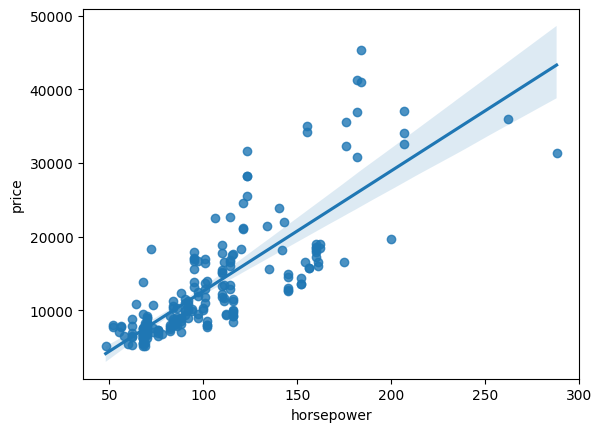

In [21]:
sns.regplot(x=X['horsepower'], y=Y['price'])
plt.show()

Store inputs in X and output in Y variable

## 7. Data splitting

##### How does data splitting function?

Data splitting refers to the division of data into two or more parts. Typically, a two-part split is used to train the model while the other part is used to test or analyze data. In data science, data splitting is crucial, especially when building models from data.

Generally we use sklearn library function sklearn.model_selection for data splitting

In [22]:
x_train, x_test,y_train,y_test = train_test_split(X,Y,test_size =0.2)

In [23]:
print('x_train:', x_train.shape)
print('x_test: ', x_test.shape)
print('y_train:', y_train.shape)
print('y_test: ', y_test.shape)

x_train: (164, 10)
x_test:  (41, 10)
y_train: (164, 1)
y_test:  (41, 1)


## 8. Model selection and implimentation (linear regression)

In [24]:
clf = LinearRegression()

## 9. Model training

In [25]:
clf.fit(x_train,y_train)

LinearRegression()

## 10. Model evaluation

In [26]:
clf.score(x_test,y_test)

0.7749654838807474

In [27]:
predict = clf.predict(x_test)
predict

array([[12282.52185333],
       [16888.53680346],
       [25281.73016487],
       [ 6995.11215414],
       [12181.75656434],
       [ 8022.33686919],
       [13262.90464001],
       [10150.46439495],
       [14248.91118283],
       [ 6152.2154902 ],
       [ 6152.2154902 ],
       [15448.25572868],
       [ 7312.40098228],
       [25034.55639277],
       [ 5769.53982538],
       [15974.00547843],
       [14149.25226513],
       [ 8032.52303631],
       [ 8620.57861545],
       [ 4308.0634241 ],
       [18731.71264777],
       [12438.64385944],
       [14479.65955858],
       [ 5257.816969  ],
       [ 6858.23274556],
       [10326.91692835],
       [15772.47935067],
       [24650.67279865],
       [13679.86550459],
       [14425.56027528],
       [ 7882.38638344],
       [10792.11948228],
       [ 8003.94174233],
       [23150.84095458],
       [36253.82814035],
       [14580.23891359],
       [18561.37012427],
       [ 8063.02717805],
       [17087.18400833],
       [12339.81268997],


Here, the accuracy of our model 76.92%

# Evaluations Metric for Regression:

- **Mean Absolute Error(MAE)**
- **Mean Squared Error(MSE)**
- **RMSE**
- **RMSLE**
- **R squared**
- **Adjusted R Squares**

# 1) Mean Absolute Error(MAE)
MAE is a very simple metric which calculates the absolute difference between actual and predicted values.

To better understand, let’s take an example you have input data and output data and use Linear Regression, which draws a best-fit line.

Now you have to find the MAE of your model which is basically a mistake made by the model known as an error. Now find the difference between the actual value and predicted value that is an absolute error but we have to find the mean absolute of the complete Column.

so, sum all the errors and divide them by a total number of observations And this is MAE. And we aim to get a minimum MAE because this is a loss.

![](https://editor.analyticsvidhya.com/uploads/71890MAE%20Formula.png)

- Advantages of MAE
    - The MAE you get is in the same unit as the output variable.
    - It is most Robust to outliers.

- Disadvantages of MAE
    - The graph of MAE is not differentiable so we have to apply various optimizers like Gradient descent which can be differentiable.

In [28]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, predict))

2907.734926257681


# 2) Mean Squared Error(MSE)
MSE is a most used and very simple metric with a little bit of change in mean absolute error. Mean squared error states that finding the squared difference between actual and predicted value.

So, above we are finding the absolute difference and here we are finding the squared difference.

What actually the MSE represents? It represents the squared distance between actual and predicted values. we perform squared to avoid the cancellation of negative terms and it is the benefit of MSE.

![](https://lh3.googleusercontent.com/-JBio3Q_1FiI/YB2oQKEmRBI/AAAAAAAAAkM/c8KJ3wPwtMEd3Ik0nYMMdmr_pRqMF6MlQCLcBGAsYHQ/w550-h177/image.png)

- Advantages of MSE
    - The graph of MSE is differentiable, so you can easily use it as a loss function.

- Disadvantages of MSE
    - The value you get after calculating MSE is a squared unit of output. for example, the output variable is in meter(m) then after calculating MSE the output we get is in meter squared.
    - If you have outliers in the dataset then it penalizes the outliers most and the calculated MSE is bigger. So, in short, It is not Robust to outliers which were an advantage in MAE.

In [29]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predict))

18218617.945209496


# 3) Root Mean Squared Error(RMSE)

As RMSE is clear by the name itself, that it is a simple square root of mean squared error.


![](https://editor.analyticsvidhya.com/uploads/34962RMSLE%20Formula.png)

- Advantages of RMSE
    - The output value you get is in the same unit as the required output variable which makes interpretation of loss easy.
- Disadvantages of RMSE
    - It is not that robust to outliers as compared to MAE.
    
    
- Most of the time people use RMSE as an evaluation metric and mostly when you are working with deep learning techniques the most preferred metric is RMSE.

In [30]:
from sklearn.metrics import mean_squared_error

print(mean_squared_error(y_test, predict,squared=False))

4268.327300619002


In [31]:
import math

print(math.sqrt(mean_squared_error(y_test, predict)))

4268.327300619002


# 4) Root Mean Squared Log Error(RMSLE)
Taking the log of the RMSE metric slows down the scale of error. The metric is very helpful when you are developing a model without calling the inputs. In that case, the output will vary on a large scale.

To control this situation of RMSE we take the log of calculated RMSE error and resultant we get as RMSLE.

![](https://cdn-images-1.medium.com/fit/t/1600/480/0*AUzyQ1rc6mpQVYfn)

In [32]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_test, predict,squared=False)

0.25593641082822205

# 5) R Squared (R2)
R2 score is a metric that tells the performance of your model, not the loss in an absolute sense that how many wells did your model perform.

In contrast, MAE and MSE depend on the context as we have seen whereas the R2 score is independent of context.

So, with help of R squared we have a baseline model to compare a model which none of the other metrics provides. The same we have in classification problems which we call a threshold which is fixed at 0.5. So basically R2 squared calculates how must regression line is better than a mean line.

Hence, R2 squared is also known as Coefficient of Determination or sometimes also known as Goodness of fit.

![](https://editor.analyticsvidhya.com/uploads/22091R2%20Squared%20Formula.png)

Now, how will you interpret the R2 score? suppose If the R2 score is zero then the above regression line by mean line is equal means 1 so 1-1 is zero. So, in this case, both lines are overlapping means model performance is worst, It is not capable to take advantage of the output column.

Now the second case is when the R2 score is 1, it means when the division term is zero and it will happen when the regression line does not make any mistake, it is perfect. In the real world, it is not possible.

So we can conclude that as our regression line moves towards perfection, R2 score move towards one. And the model performance improves.c

The normal ase is when the R2 score is between zero and one like 0.8 which means your model is capable to explain 80 per cent of the variance of data.

![](https://ashutoshtripathicom.files.wordpress.com/2019/01/rsquarecanva2.png)

R-squared (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable in a regression model.

In [33]:
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predict)
print(r2)

0.7749654838807474


# 6) Adjusted R Squared
The disadvantage of the R2 score is while adding new features in data the R2 score starts increasing or remains constant but it never decreases because It assumes that while adding more data variance of data increases.

But the problem is when we add an irrelevant feature in the dataset then at that time R2 sometimes starts increasing which is incorrect.

Hence, To control this situation Adjusted R Squared came into existence.

![](https://lh3.googleusercontent.com/-6T1LxrK1by8/YB6D5hjSCjI/AAAAAAAAAlk/gCmLpEJMJ3MpwO6r-sI7GQzuOQP2I1B3QCLcBGAsYHQ/w332-h179/image.png)

Now as K increases by adding some features so the denominator will decrease, n-1 will remain constant. R2 score will remain constant or will increase slightly so the complete answer will increase and when we subtract this from one then the resultant score will decrease. so this is the case when we add an irrelevant feature in the dataset.

And if we add a relevant feature then the R2 score will increase and 1-R2 will decrease heavily and the denominator will also decrease so the complete term decreases, and on subtracting from one the score increases.

In [34]:
n=41  # n = number of observations

k=10  # k = number of independent variables

r2 = r2_score(y_test, predict)  #r2 = r square score

adj_r2_score = 1 - ((1-r2)*(n-1)/(n-k-1))
print(adj_r2_score)

0.6999539785076632


There can be situations where you have to use different evaluation metrics and if you are a beginner then you should try all these metrics which will help you to get a better understanding of each to evaluate when you can use which metric.